# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Azza Annathifa
- **Email:** azza.annathifa@student.ub.ac.id
- **ID Dicoding:** azza_annathifa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimanakah prospek keseringan peminjam sepeda pada musim dan hari libur tertentu?
- Pertanyaan 2 : Bagaimanakah perilaku peminjam sepeda pada jam-jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
dayBike = pd.read_csv("https://raw.githubusercontent.com/azzameong/AnalisisDataDicoding/main/Bike-sharing-dataset/day.csv")
dayBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
hourBike = pd.read_csv("https://raw.githubusercontent.com/azzameong/AnalisisDataDicoding/main/Bike-sharing-dataset/hour.csv")
hourBike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [32]:
dayBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [33]:
dayBike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [34]:
print("Jumlah duplikasi: ", dayBike.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
dayBike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [36]:
hourBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [37]:
hourBike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [38]:
print("Jumlah duplikasi: ", hourBike.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
hourBike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [40]:
dayBike.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", dayBike.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
dayBike_columns = ["dteday"]
 
for column in dayBike_columns:
  dayBike[column] = pd.to_datetime(dayBike[column])

In [42]:
dayBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [43]:
hourBike.drop_duplicates(inplace=True)
print("Jumlah duplikasi: "), hourBike.duplicated().sum()

Jumlah duplikasi: 


(None, 0)

In [44]:
hourBike_columns = ["dteday"]
 
for column in hourBike_columns:
  hourBike[column] = pd.to_datetime(hourBike[column])

In [45]:
hourBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
dayBike.describe(include="all")

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_15200\1742235597.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dayBike.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [47]:
dayBike.groupby(by="season").count()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
1,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
2,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
3,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
4,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178


In [48]:
dayBike.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std", "count"]
})

cnt                                      
         max   min         mean          std count
season                                            
1       7836   431  2604.132597  1399.942119   181
2       8362   795  4992.331522  1695.977235   184
3       8714  1115  5644.303191  1459.800381   188
4       8555    22  4728.162921  1699.615261   178

In [49]:
dayBike.groupby(by=["season", "holiday"]).agg({
    "cnt" : "count",
})

cnt
season holiday     
1      0        174
       1          7
2      0        180
       1          4
3      0        184
       1          4
4      0        172
       1          6

In [50]:
hourBike.describe(include="all")

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_15200\2888718233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hourBike.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [51]:
hourBike.groupby("hr")["cnt"].agg(['min', 'max', 'mean', 'std'])

,min,max,mean,std
hr,,,,
0,2,283,53.898072,42.307910
1,1,168,33.375691,33.538727
2,1,132,22.869930,26.578642
3,1,79,11.727403,13.239190
4,1,28,6.352941,4.143818
5,1,66,19.889819,13.200765
6,1,213,76.044138,55.084348
7,1,596,212.064649,161.441936
8,5,839,359.011004,235.189285


In [52]:
hourBike.groupby(by=["hr"]).agg({
    "cnt" : ["min", "max","count"],
    "casual" : "mean",
    "registered" : "mean"
})

cnt                casual  registered
   min  max count       mean        mean
hr                                      
0    2  283   726  10.158402   43.739669
1    1  168   724   6.504144   26.871547
2    1  132   715   4.772028   18.097902
3    1   79   697   2.715925    9.011478
4    1   28   697   1.253945    5.098996
5    1   66   717   1.411437   18.478382
6    1  213   725   4.161379   71.882759
7    1  596   727  11.055021  201.009629
8    5  839   727  21.679505  337.331499
9   14  426   727  30.891334  188.418157
10   8  539   727  46.477304  127.191197
11  10  663   727  59.540578  148.602476
12   3  776   728  68.293956  185.021978
13  11  760   729  72.308642  181.352538
14  12  750   729  75.567901  165.381344
15   7  750   729  74.905350  176.327846
16  11  783   730  73.745205  238.238356
17  15  976   730  74.273973  387.178082
18  23  977   728  61.120879  364.390110
19  11  743   728  48.770604  262.752747
20  11  567   728  36.233516  189.796703
21   6  584   728  28.255495  144.059066
22   9  502   728  22.252747  109.082418
23   2  256   728  15.199176   72.631868

In [53]:
dayBike.describe(include="all")
hourBike.describe(include="all")

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_15200\2406905490.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dayBike.describe(include="all")
C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_15200\2406905490.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hourBike.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah prospek keseringan peminjam sepeda pada musim dan hari libur tertentu?

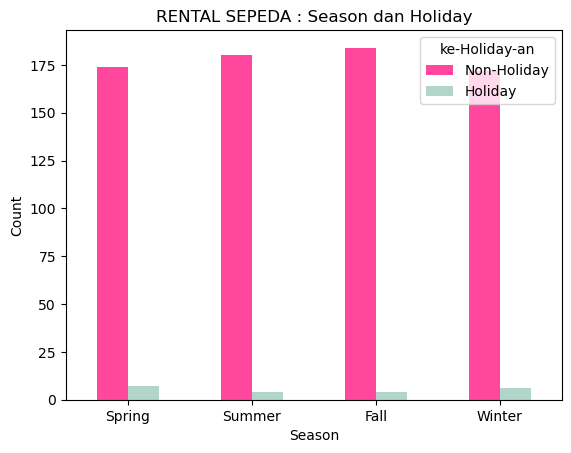

In [54]:
seasonHoliday = dayBike.groupby(by=["season", "holiday"]).agg({"cnt": "count"})

pivot_data = seasonHoliday.reset_index().pivot(index='season', columns='holiday', values='cnt')

pivot_data.plot(kind='bar', stacked=False, color=['#FF489D', '#b1d5c8'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('RENTAL SEPEDA : Season dan Holiday')
plt.legend(title='ke-Holiday-an', labels=['Non-Holiday', 'Holiday'])
plt.xticks(range(len(pivot_data.index)), ['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()

### Pertanyaan 2: Bagaimanakah perilaku peminjam sepeda pada jam-jam tertentu?

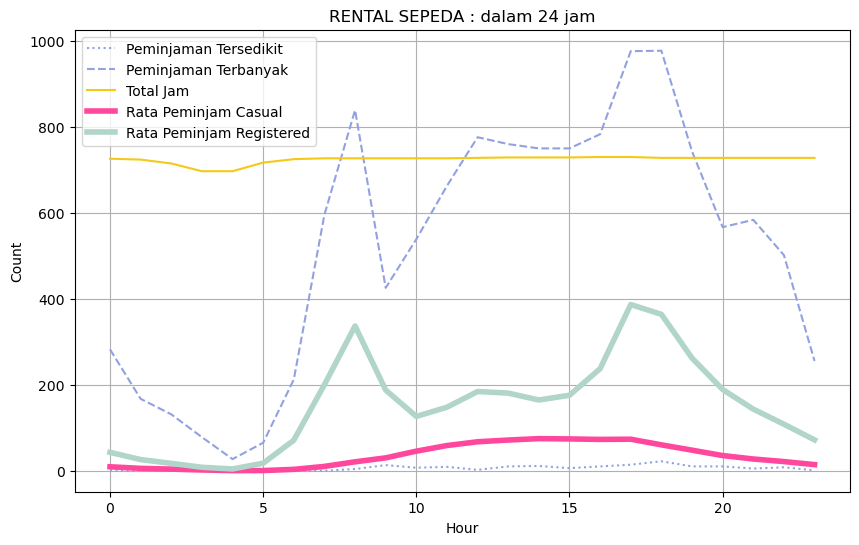

In [55]:
behavior = hourBike.groupby(by=["hr"]).agg({
    "cnt": ["min", "max", "count"],
    "casual": "mean",
    "registered": "mean"
}).reset_index()

hours = behavior['hr']
cnt_min = behavior['cnt']['min']
cnt_max = behavior['cnt']['max']
cnt_count = behavior['cnt']['count']
casual_mean = behavior['casual']['mean']
registered_mean = behavior['registered']['mean']

plt.figure(figsize=(10, 6))
plt.plot(hours, cnt_min, label='Peminjaman Tersedikit', color='#92a1e0',linestyle=':')
plt.plot(hours, cnt_max, label='Peminjaman Terbanyak', color='#92a1e0',linestyle='--')
plt.plot(hours, cnt_count, label='Total Jam', color='#f4c917')
plt.plot(hours, casual_mean, label='Rata Peminjam Casual',color='#FF489D', linewidth=4)
plt.plot(hours, registered_mean, label='Rata Peminjam Registered', color='#b1d5c8', linewidth=4)

plt.title('RENTAL SEPEDA : dalam 24 jam')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()

plt.grid(True)
plt.show()


## Conclusion

- Conclution pertanyaan 1 : 
Total peminjam sepeda pada tiap musim baik saat holiday dan non holiday tidak jauh berbeda, namun yang paling banyak saat non holiday adalah ketika musim "Summer", sedangkan peminjam sepeda ketika saat holiday paling banyak adalah saat musim "Spring".
Kemudian mengenai total peminjaman pada saat non-holiday paling sedikit adalah ketika "winter", mungkin dikarenakan keseharian warga yang enggan keluar bersepeda ketika musim dingin dengan banyaknya salju di jalan.
Sehingga dapat disimpulkan apabila sedang musim liburan (holiday) di musim panas, sangat prospek peluang larisnya usaha ini dikarenakan sedang banyaknya pendatang dan warga lokal yang sedang ingin berlibur.
- Conclution pertanyaan 2 : 
Dari grafik tersebut, kita dapat melihat pada jam berapa rata-rata dalam kurun 1 tahun (2011-2012) orang banyak dan sedikitnya meminjam sepeda.
Namun, yang ingin ditekankan disini adalah Rata-rata Peminjam Terdaftar yang mayoritas lebih tinggi daripada peminjam Casual sehingga dapat disimpulkan jika peminjam sepeda antusias untuk kembali lagi meminjam. Oleh karena itu, bisnis ini dapat menjanjikan ke depannya terlebih lagi jika menambahkan fasilitas atau reward bagi peminjaman terdaftar(registered).
Selain itu, informasi yang kita dapat adalah waktu tersepi peminjaman sepeda adalah ketika subuh dini hari sekitar pukul 3-4 pagi.